In [1]:
import pandas as pd

In [2]:
df= pd.read_csv(r"C:\Users\U6056186\Downloads\spam.csv", encoding='latin-1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

In [5]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
df.drop(df.columns[[2,3,4]],axis=1,inplace=True)

In [8]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
df.rename({df.columns[0]:"Target",df.columns[1]:"Text"},axis=1,inplace=True)

In [10]:
df.head()

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
lc =LabelEncoder()

In [13]:
df['Target'] = lc.fit_transform(df['Target'])

In [14]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [16]:
df.duplicated().sum()

403

In [17]:
df.drop_duplicates(inplace=True,keep='first')

In [18]:
df.shape

(5169, 2)

# 2. EDA

In [19]:
df['Target'].value_counts()

0    4516
1     653
Name: Target, dtype: int64

In [20]:
import matplotlib.pyplot as plt

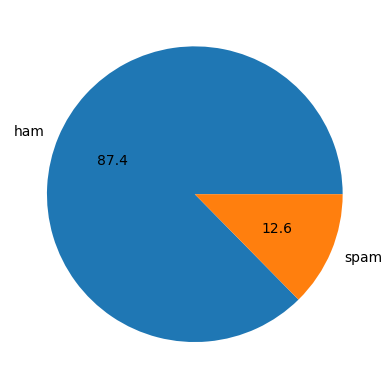

In [21]:
plt.pie(df['Target'].value_counts(),labels=['ham','spam'],autopct='%0.1f')
plt.show()

In [22]:
import nltk

In [23]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\U6056186\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
df['Len']= df['Text'].apply(len)

In [25]:
df.head()

,Target,Text,Len
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [26]:
df['num_words'] = df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [27]:
df.head()

,Target,Text,Len,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [28]:
df['num_sent'] = df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [29]:
df.head()

,Target,Text,Len,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [30]:
df.describe()

,Target,Len,num_words,num_sent
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [31]:
df[df['Target'] == 0].describe()

,Target,Len,num_words,num_sent
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.459256,17.123782,1.820195
std,0.0,56.358207,13.493970,1.383657
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000
75%,0.0,90.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,38.000000


In [32]:
df[df['Target'] == 1].describe()

,Target,Len,num_words,num_sent
count,653.0,653.000000,653.000000,653.000000
mean,1.0,137.891271,27.667688,2.970904
std,0.0,30.137753,7.008418,1.488425
min,1.0,13.000000,2.000000,1.000000
25%,1.0,132.000000,25.000000,2.000000
50%,1.0,149.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,224.000000,46.000000,9.000000


In [33]:
import seaborn as sns

<Axes: xlabel='num_words', ylabel='Count'>

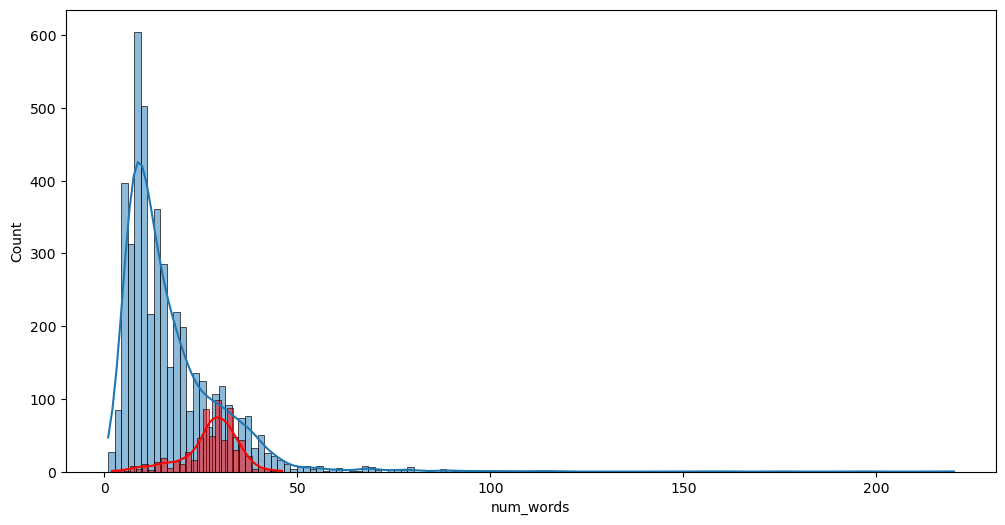

In [34]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Target']==0]['num_words'],kde=True)
sns.histplot(df[df['Target']==1]['num_words'],kde=True,color='r')

<Axes: xlabel='Len', ylabel='Count'>

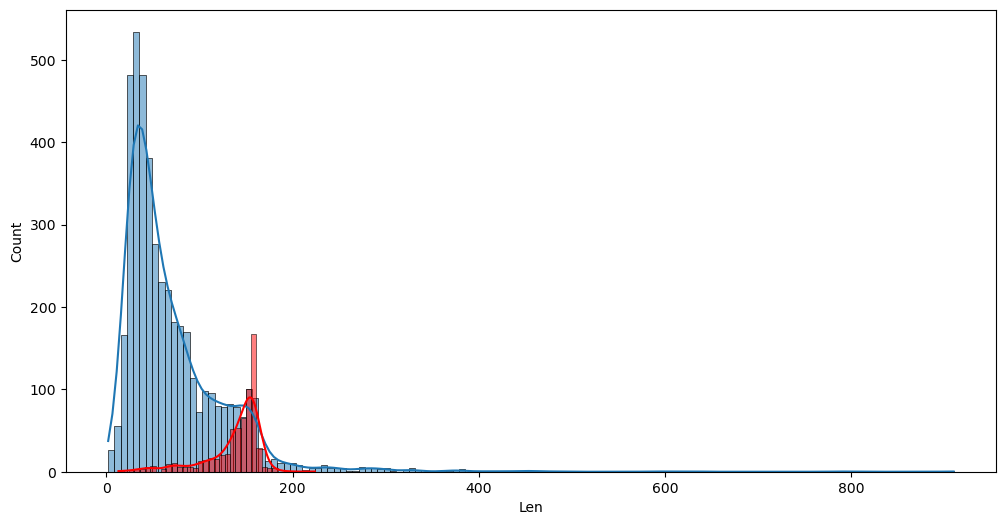

In [35]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Target']==0]['Len'],kde=True)
sns.histplot(df[df['Target']==1]['Len'],kde=True,color='r')

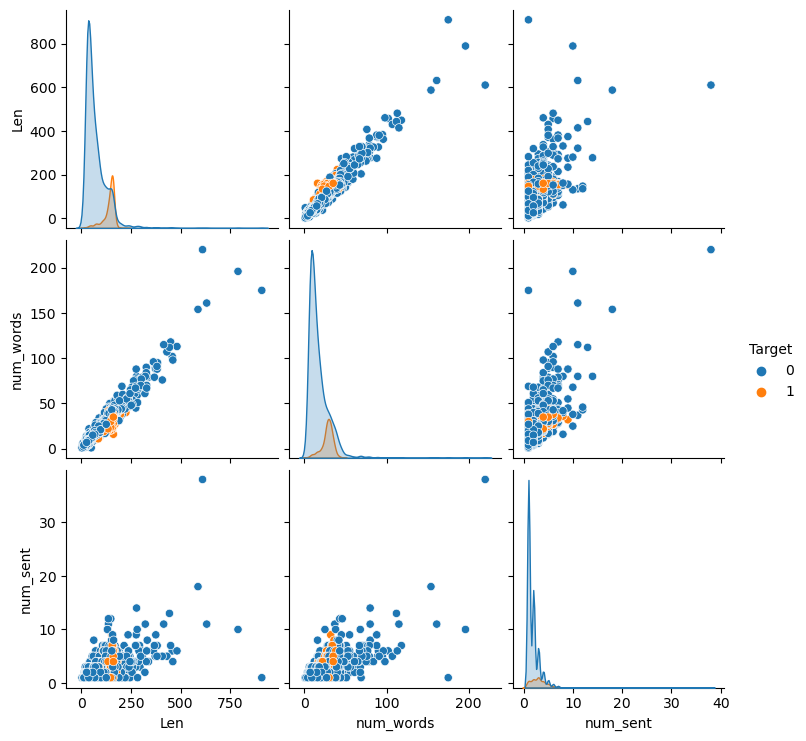

In [36]:
sns.pairplot(df,hue='Target')
plt.show()

C:\Users\U6056186\AppData\Local\Temp\ipykernel_1752\2271070662.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


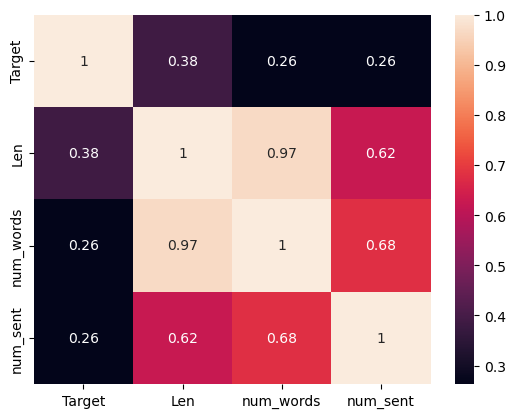

In [37]:
sns.heatmap(df.corr(),annot=True)
plt.show()

# Data Preprocessing

Lower case

Tokenization

Removing special characters

Removing stop words and punctuation

Stemming

In [38]:
df.head()

,Target,Text,Len,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [39]:
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
import string

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\U6056186\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [118]:
def transform_text(text):
    text = text.lower()
    text= nltk.word_tokenize(text)
    y=[]
    pc = PorterStemmer()
    for i in text:
        if i.isalnum():
            if i not in string.punctuation and i not in stopwords.words('english'):
                y.append(pc.stem(i))
    
    return " ".join(y)

In [120]:
transform_text('GGGGo until loving caring and living jurong point, crazy.. Available only @#$%^&umais!!@@AKASS')

'ggggo love care live jurong point crazi avail umai akass'

In [42]:
df['transformed_text']= df['Text'].apply(transform_text)

In [43]:
df.head()

,Target,Text,Len,num_words,num_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [44]:
from wordcloud import WordCloud

In [45]:
wc = WordCloud(width=1200,height=1000,min_font_size=10,background_color='white')
spamCloud= wc.generate(df[df['Target']==1]['transformed_text'].str.cat(sep=' '))

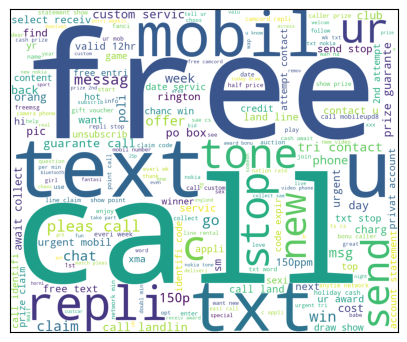

In [46]:
fig = plt.figure(figsize=(5,7), num=1, clear=True)
ax = plt.subplot(1, 1, 1, xticks=[], yticks=[], frameon=True)
plt.imshow(spamCloud)
plt.show()

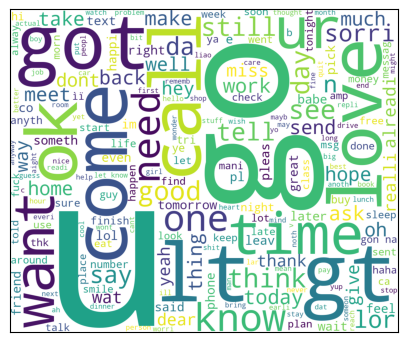

In [47]:
wc = WordCloud(width=1200,height=1000,min_font_size=10,background_color='white')
spamCloud= wc.generate(df[df['Target']==0]['transformed_text'].str.cat(sep=' '))
fig = plt.figure(figsize=(5,7), num=1, clear=True)
ax = plt.subplot(1, 1, 1, xticks=[], yticks=[], frameon=True)
plt.imshow(spamCloud)
plt.show()

In [48]:
from collections import Counter 

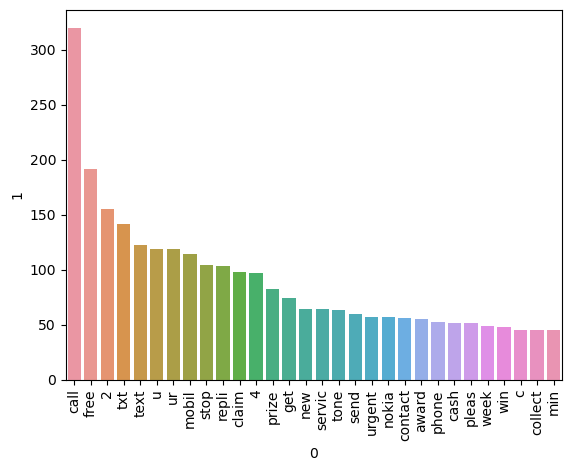

In [49]:
spamtotalwords=[]

for i in df[df['Target']==1]['transformed_text'].tolist():
    for word in i.split():
        spamtotalwords.append(word)
sns.barplot(x=pd.DataFrame(Counter(spamtotalwords).most_common(30))[0],
            y=pd.DataFrame(Counter(spamtotalwords).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

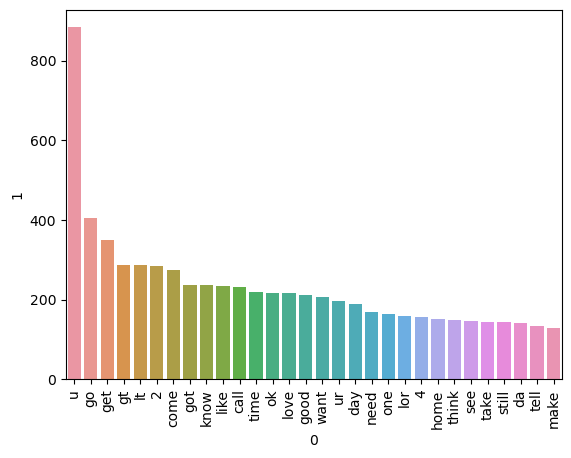

In [50]:
hemtotalwords=[]

for i in df[df['Target']==0]['transformed_text'].tolist():
    for word in i.split():
        hemtotalwords.append(word)
        
sns.barplot(x=pd.DataFrame(Counter(hemtotalwords).most_common(30))[0],
            y=pd.DataFrame(Counter(hemtotalwords).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

# 4. Model Building

In [108]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [58]:
cv= CountVectorizer()

In [59]:
X= cv.fit_transform(df['transformed_text']).toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [60]:
y = df['Target']

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [63]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=13
                                                )

In [64]:
gnb.fit(X_train,y_train)
ypred1 = gnb.predict(X_test)
print('acc score=', accuracy_score(y_test,ypred1))
print('confusion M=', confusion_matrix(y_test,ypred1))
print('precision score=', precision_score(y_test,ypred1))

acc score= 0.8704061895551257
confusion M= [[782 116]
 [ 18 118]]
precision score= 0.5042735042735043


In [65]:
mnb.fit(X_train,y_train)
ypred2 = mnb.predict(X_test)
print('acc score=', accuracy_score(y_test,ypred2))
print('confusion M=', confusion_matrix(y_test,ypred2))
print('precision score=', precision_score(y_test,ypred2))

acc score= 0.971953578336557
confusion M= [[881  17]
 [ 12 124]]
precision score= 0.8794326241134752


In [66]:
bnb.fit(X_train,y_train)
ypred3 = bnb.predict(X_test)
print('acc score=', accuracy_score(y_test,ypred3))
print('confusion M=', confusion_matrix(y_test,ypred3))
print('precision score=', precision_score(y_test,ypred3))


acc score= 0.9642166344294004
confusion M= [[893   5]
 [ 32 104]]
precision score= 0.9541284403669725


In [109]:
tfv = TfidfVectorizer()

In [115]:
Xt= tfv.fit_transform(df['transformed_text'])
Xt= tfv.transform(df['transformed_text']).toarray()
Xt

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [69]:
X_train,X_test,y_train,y_test = train_test_split(Xt,y, test_size=0.2, random_state=2)

In [70]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [71]:
gnb.fit(X_train,y_train)
ypred1 = gnb.predict(X_test)
print('acc score=', accuracy_score(y_test,ypred1))
print('confusion M=', confusion_matrix(y_test,ypred1))
print('precision score=', precision_score(y_test,ypred1))

acc score= 0.8762088974854932
confusion M= [[793 103]
 [ 25 113]]
precision score= 0.5231481481481481


In [111]:
mnb.fit(X_train,y_train)
ypred2 = mnb.predict(X_test)
print('acc score=', accuracy_score(y_test,ypred2))
print('confusion M=', confusion_matrix(y_test,ypred2))
print('precision score=', precision_score(y_test,ypred2))

acc score= 0.9593810444874274
confusion M= [[896   0]
 [ 42  96]]
precision score= 1.0


In [73]:
bnb.fit(X_train,y_train)
ypred3 = bnb.predict(X_test)
print('acc score=', accuracy_score(y_test,ypred3))
print('confusion M=', confusion_matrix(y_test,ypred3))
print('precision score=', precision_score(y_test,ypred3))


acc score= 0.9700193423597679
confusion M= [[893   3]
 [ 28 110]]
precision score= 0.9734513274336283


In [74]:
# choose tfidf with mnb

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier
from xgboost import XGBClassifier

In [76]:
lrc = LogisticRegression(solver='liblinear',penalty='l1')
svc = SVC(kernel='sigmoid',gamma=1.0)
dtc = DecisionTreeClassifier(max_depth=5)
knc = KNeighborsClassifier(n_jobs=-1)
rfc = RandomForestClassifier(n_estimators=50,random_state=2,n_jobs=-1)
abc = AdaBoostClassifier(n_estimators=50,random_state=2)
bc = BaggingClassifier(n_estimators=50,random_state=2,n_jobs=-1)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2,n_jobs=-1)
xgb = XGBClassifier(n_estimators=50,random_state=2,n_jobs=-1)

In [77]:
clfs = {
    'lrc':lrc,
    'svc' : svc,
    'dtc' : dtc,
    'knc' : knc,
    'rfc' : rfc,
    'abc' : abc,
    'bc': bc,
    'etc' :etc,
    'xgb' :xgb
}

In [78]:
def train_clf(clf,X_train,X_test,y_train,y_test):
    clf.fit(X_train,y_train)
    ypred= clf.predict(X_test)
    accuracy = accuracy_score(y_test,ypred)
    precision = precision_score(y_test,ypred)
    return accuracy,precision

In [79]:
x = train_clf(lrc,X_train,X_test,y_train,y_test)

In [80]:
x

(0.9516441005802708, 0.94)

In [81]:
accuracy_scores = []
precision_scores = []
algo=[]
for name,clf in clfs.items():
    algo.append(name)
    accuracy,precision= train_clf(clf,X_train,X_test,y_train,y_test)
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    


In [82]:
print(algo, accuracy_scores,precision_scores)

['lrc', 'svc', 'dtc', 'knc', 'rfc', 'abc', 'bc', 'etc', 'xgb'] [0.9516441005802708, 0.9729206963249516, 0.9352030947775629, 0.9003868471953579, 0.971953578336557, 0.9613152804642167, 0.9584139264990329, 0.9729206963249516, 0.9729206963249516] [0.94, 0.9741379310344828, 0.8380952380952381, 1.0, 1.0, 0.9454545454545454, 0.8625954198473282, 0.9824561403508771, 0.9435483870967742]


In [83]:
performance_matrix= pd.DataFrame({'Algo':algo,'Accuracy':accuracy_scores,'Precision': precision_scores})

In [84]:
performance_matrix.sort_values('Precision',ascending=False)

,Algo,Accuracy,Precision
3,knc,0.900387,1.000000
4,rfc,0.971954,1.000000
7,etc,0.972921,0.982456
1,svc,0.972921,0.974138
5,abc,0.961315,0.945455
8,xgb,0.972921,0.943548
0,lrc,0.951644,0.940000
6,bc,0.958414,0.862595
2,dtc,0.935203,0.838095


In [89]:
pd.melt(performance_matrix,id_vars='Algo')

,Algo,variable,value
0,lrc,Accuracy,0.951644
1,svc,Accuracy,0.972921
2,dtc,Accuracy,0.935203
3,knc,Accuracy,0.900387
4,rfc,Accuracy,0.971954
5,abc,Accuracy,0.961315
6,bc,Accuracy,0.958414
7,etc,Accuracy,0.972921
8,xgb,Accuracy,0.972921
9,lrc,Precision,0.940000


# Voting Classifier

In [90]:
# Voting Classifier
rfc = RandomForestClassifier(n_estimators=50,random_state=2,n_jobs=-1)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)


In [91]:
from sklearn.ensemble import VotingClassifier

In [93]:
vote = VotingClassifier(estimators=[('rfc',rfc),('mnb',mnb),('etc',etc)],
                        voting='soft')

In [94]:
vote.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('mnb', MultinomialNB()),
                             ('etc',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [95]:
ypredV=vote.predict(X_test)

In [99]:
print(accuracy_score(y_test,ypredV))
print(confusion_matrix(y_test,ypredV))
print(precision_score(y_test,ypredV))

0.9787234042553191
[[896   0]
 [ 22 116]]
1.0


# Stacking

In [101]:
from sklearn.ensemble import StackingClassifier

In [103]:
Stackclf = StackingClassifier(estimators=[('rfc',rfc),('mnb',mnb),('etc',etc)],
                   final_estimator=RandomForestClassifier())

In [104]:
Stackclf.fit(X_train,y_train)

StackingClassifier(estimators=[('rfc',
                                RandomForestClassifier(n_estimators=50,
                                                       n_jobs=-1,
                                                       random_state=2)),
                               ('mnb', MultinomialNB()),
                               ('etc',
                                ExtraTreesClassifier(n_estimators=50,
                                                     random_state=2))],
                   final_estimator=RandomForestClassifier())

In [106]:
ypredS=Stackclf.predict(X_test)

In [107]:
print(accuracy_score(y_test,ypredS))
print(confusion_matrix(y_test,ypredS))
print(precision_score(y_test,ypredS))

0.9748549323017408
[[884  12]
 [ 14 124]]
0.9117647058823529


In [112]:
import pickle as pkl

In [116]:
pkl.dump(tfv,open('vectorizer.pkl','wb'))
pkl.dump(mnb,open('clf.pkl','wb'))